<h1>PAD Lab Experiment 8</h1>

<h2>Roshan Srivastava <br> J047<br>MBA Tech. EXTC SEM 7</h2>

<h3>Aim: Isolation Forest for Anomaly Dectection</h3>

<h1>Part 1: Isolation Forest on Toy Dataset</h1>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
x = (0.3 * np.random.randn(100,2)) #creating a normal distribtion (training)
x_train = np.r_[x+2,x-2]

In [38]:
x = (0.3 * np.random.randn(20,2)) #creating a normal distribtion (testing)
x_test = np.r_[x+2,x-2]

In [39]:
x_train_outliers = np.random.uniform(low=-4, high=4, size=(20,2)) #creating a uniform distribtion (training outliers)

In [40]:
x_test_outliers = np.random.uniform(low=-4, high=4, size=(10,2)) #creating a uniform distribtion (testing outliers)

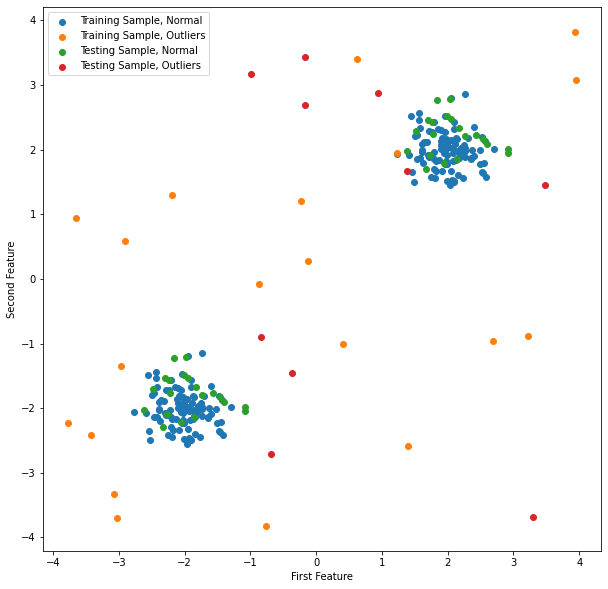

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(x_train[:,0],x_train[:,1],label='Training Sample, Normal')
plt.scatter(x_train_outliers[:,0],x_train_outliers[:,1],label='Training Sample, Outliers')
plt.scatter(x_test[:,0],x_test[:,1],label='Testing Sample, Normal')
plt.scatter(x_test_outliers[:,0],x_test_outliers[:,1],label='Testing Sample, Outliers')
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.legend() #plotting samples and anomalies

In [42]:
x_train_data= np.append(x_train,x_train_outliers,axis=0)
x_test_data= np.append(x_test,x_test_outliers,axis=0) #appending normal samples with outliers

In [43]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(random_state=0, contamination=0.05)
model.fit(x_train_data) #applying Isolatino Forest on sample data

IsolationForest(contamination=0.05, random_state=0)

In [44]:
y_train = model.predict(x_train_data)
y_test = model.predict(x_test_data)

Text(0, 0.5, 'Second Feature')

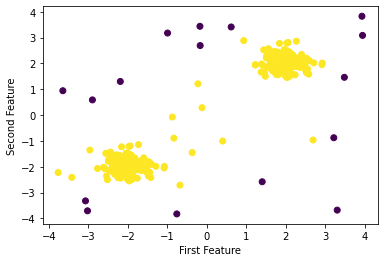

In [45]:
plt.scatter(x_train_data[:,0],x_train_data[:,1],c=y_train)
plt.scatter(x_test_data[:,0],x_test_data[:,1],c=y_test)
plt.xlabel("First Feature")
plt.ylabel("Second Feature") #getting results from Isolation Forest

<h1>Part 2: Isolation Forest on Credit Card Dataset</h1>

In [53]:
df = pd.read_csv("creditcard.csv")
df.shape

(284807, 31)

In [54]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [56]:
data = df.sample(frac=0.2,random_state=1)
data.shape

(56961, 31)

In [57]:
fraud_samples = data[data["Class"] == 1]
normal_samples = data[data["Class"] == 0]
fraud_samples.shape,normal_samples.shape

((87, 31), (56874, 31))

In [62]:
anomaly_fraction = len(fraud_samples)/len(data)
anomaly_fraction

0.0015273608258281983

In [111]:
model = IsolationForest(n_estimators=100,max_samples='auto',contamination=anomaly_fraction,random_state=1) #deciding number of decision trees and other parameters
model.fit(data[['Class']])

IsolationForest(contamination=0.0015273608258281983, random_state=1)

In [112]:
data['scores'] = model.decision_function(data[['Class']]) # deciding decision function
data['anomaly_scores'] = model.predict(data[['Class']])

In [113]:
data[data['anomaly_scores'] == 1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scores,anomaly_scores
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0,0.000223,1
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0,0.000223,1
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0,0.000223,1
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0,0.000223,1
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0,0.000223,1


In [114]:
anomalies = data[data['Class']==1]
anomalies.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scores,anomaly_scores
235644,148479.0,-1.541678,3.846800,-7.604114,3.121459,-1.254924,-2.084875,-2.385027,1.471140,-2.530507,...,0.065370,0.257209,-0.693654,-0.335702,0.577052,0.398348,122.68,1,-0.145701,-1
254344,156685.0,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373588,-0.209476,0.208494,...,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,187.11,1,-0.145701,-1
192529,129741.0,-1.396204,2.618584,-6.036770,3.552454,1.030091,-2.950358,-1.528506,0.189319,-1.433554,...,0.356029,-0.762352,0.096510,-0.487861,0.062655,-0.240732,1.00,1,-0.145701,-1
176049,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1,-0.145701,-1
42769,41237.0,-10.281784,6.302385,-13.271718,8.925115,-9.975578,-2.832513,-12.703253,6.706846,-7.078424,...,0.042805,0.478279,0.157771,0.329901,0.163504,-0.485552,118.30,1,-0.145701,-1


In [115]:
predicted_anomalies = data[data['anomaly_scores']==-1]
predicted_anomalies.shape

(87, 33)

In [116]:
accuracy = predicted_anomalies.shape[0]/anomalies.shape[0]*100
accuracy #calculating accuracy

100.0

<h1>Conclusion:</h1>
<ol>
<li>Isolation Forest is applied on toy dataset of 100 samples. If contamination is 0.1, then some of the normal samples are declared anomalies. If contamination is increased to 0.2, some more normal samples are added to anomalies</li>
<li>Isolation Forest is applied on credit card dataset, which is an ensemble of 100 decision trees. The model gives 100% accuracy for anomalies. If number of decision trees is reduced to 5, accuracy reduces to 0</li>
<li>It can be concluded that the model can be trained to fewer number of tress to reduce the complexity</li>
</ol>